## 一、算法介绍

梯度提升树（Gradient Boosting Trees, GBT）是一种强大的集成学习方法，它通过迭代地添加弱预测模型来构建一个强预测模型。在每一轮迭代中，新的模型会试图纠正前序模型产生的错误。GBT可以用于回归和分类问题，并且在许多实际应用中表现优异。

## 二、算法原理

### 2.1 基本概念
梯度提升是一种迭代的技术，它通过逐步减少损失函数来改进模型。在每次迭代中，都会训练一个新的弱学习器，该学习器用来拟合当前模型的残差。

### 2.2 损失函数
假设我们有一个训练集$\mathcal{D} = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$，其中$x_i$是特征向量，$y_i$是对应的标签。对于回归问题，常用的损失函数$L(y, F(x))$可以是均方误差（Mean Squared Error, MSE），即
$$L(y, F(x)) = \frac{1}{2}(y - F(x))^2$$

### 2.3 迭代过程
给定初始模型$F_0(x)$，通常是所有样本输出的平均值。之后，在第$m$轮迭代时，我们计算负梯度方向的伪残差$r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x) = F_{m-1}(x)}$，并用这些伪残差去训练一个新的回归树$h_m(x; \theta_m)$。更新后的模型为：
$$F_m(x) = F_{m-1}(x) + \nu h_m(x; \theta_m)$$
其中$\nu$是学习率，控制了新加入模型的影响程度。


## 三、 案例分析

为了展示梯度提升树的实际应用，我们将使用提供的数据集来预测机器是否会发生故障。首先加载数据，并进行必要的预处理。

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1753
           1       0.91      0.64      0.75        47

    accuracy                           0.99      1800
   macro avg       0.95      0.82      0.87      1800
weighted avg       0.99      0.99      0.99      1800



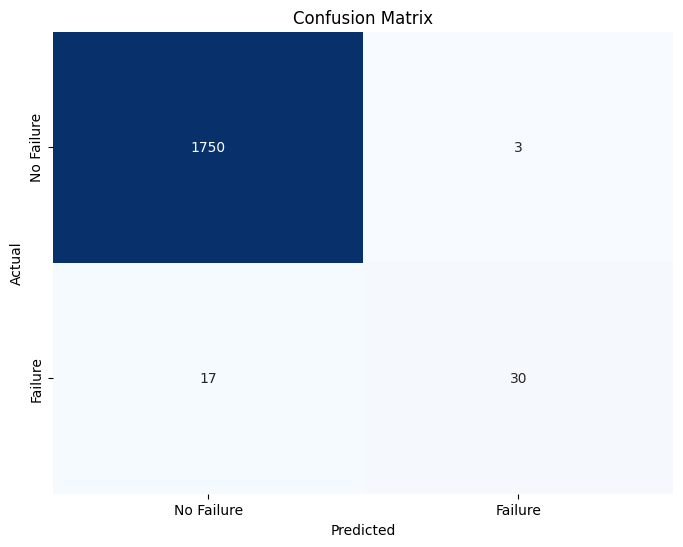

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_excel('data.xlsx', sheet_name='Sheet1')

# 数据清洗
data.drop_duplicates(inplace=True)
X = data.drop(columns=['机器编号', '是否发生故障', '具体故障类别'])
y = data['是否发生故障']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
gbt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbt_model.fit(X_train, y_train)

# 预测
y_pred = gbt_model.predict(X_test)
y_pred_proba = gbt_model.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


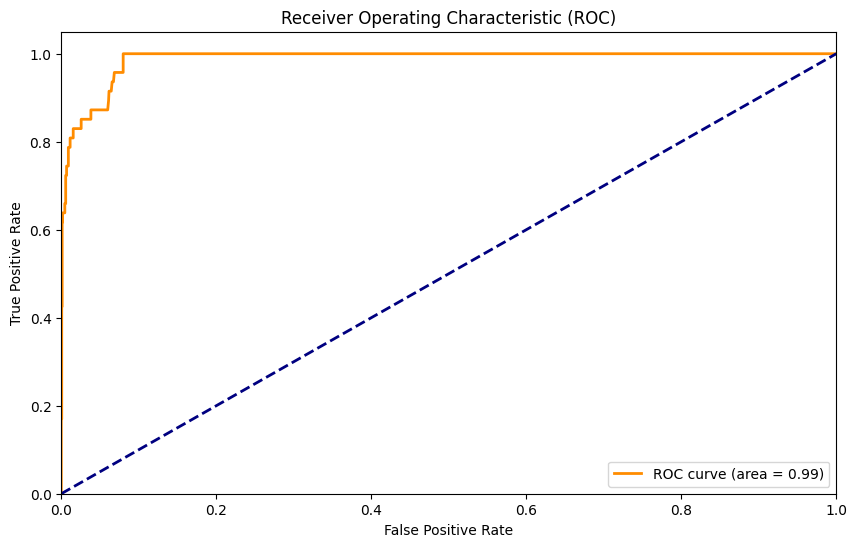

In [2]:
# 计算ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 绘制ROC曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()